In [32]:
pip install funpymodeling


In [33]:


#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl



In [ ]:
%pip install funpymodeling

In [ ]:
from google.colab import files
files.upload()

In [ ]:
data= pd.read_excel("microretailer_mit_lift_lab.xlsx")
data

In [ ]:
pd.options.display.max_columns=None
data.head(5)

In [ ]:

filtro=data.iloc[ : , [1,3,9,10,11,12,13,15,20,21,22,23,25,27,31,34,35,36,86,87]]
filtro

In [ ]:
filtro.dtypes


In [ ]:

valores_nulos=filtro.isnull().sum()
valores_nulos

In [14]:
data=filtro.copy()


In [15]:
data["233_date_establishment"]=data["233_date_establishment"].fillna("sin registro")
data["2_current_permanent_employees"]=data["2_current_permanent_employees"].fillna("sin registro")
data["4_number_permanent_employees_last_year"]=data["4_number_permanent_employees_last_year"].fillna("sin registro")
data["5_change_store_space_last_year"]=data["5_change_store_space_last_year"].fillna("sin registro")
data["20_reviews_finances_monthly"]=data["20_reviews_finances_monthly"].fillna("sin registro")
data["18_sales_records"]=data["18_sales_records"].fillna("sin registro")
data["145_number_direct_competitors"]=data["145_number_direct_competitors"].fillna("sin registro")
data["186_internet_connection"]=data["186_internet_connection"].fillna("sin registro")
data["210_sales_channels"]=data["210_sales_channels"].fillna("sin registro")
data["189_payment_methods"]=data["189_payment_methods"].fillna("sin registro")
data["157_frequency_organize_shelves"]=data["157_frequency_organize_shelves"].fillna("sin registro")
data["158_charact_organize_products_on_shelves"]=data["158_charact_organize_products_on_shelves"].fillna("sin registro")

In [ ]:
valores_nulos=data.isnull().sum()
valores_nulos

In [ ]:
#Filtro para obtener variables cuantitativas
Cuantitativas=data.iloc[ : , [6,9]]
Cuantitativas

In [ ]:
#Filtro para obtener variables cualitativas
Cualitativas=data.iloc[ : , [0,2,3,4,5,7,8,11,12,13,15,16,17,18,19]]
Cualitativas

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(15, 8))
Cuantitativas.plot(kind='box', vert=True)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [ ]:
y=Cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

In [ ]:
Datos_sin_Outliers= Cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
Datos_sin_Outliers


In [ ]:
valores_nulos=Datos_sin_Outliers.isnull().sum()
valores_nulos

In [24]:
data_clean=Datos_sin_Outliers.copy()
data_clean=data_clean.fillna(round(Datos_sin_Outliers.mean(),1))
data_clean

,97_number_of_customers_in_store,2_current_permanent_employees
0,2.0,NaN
1,0.0,NaN
2,0.0,NaN
3,0.0,NaN
4,0.0,NaN
...,...,...
166,1.0,NaN
167,1.0,NaN
168,3.0,NaN
169,0.0,NaN


In [ ]:
valores_nulos=data_clean.isnull().sum()
valores_nulos

In [26]:
Dataframe_final = pd.concat([Cualitativas, data_clean], axis=1)
Dataframe_final

,_title,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,184_store_devices,233_date_establishment,5_change_store_space_last_year,20_reviews_finances_monthly,18_sales_records,186_internet_connection,210_sales_channels,189_payment_methods,157_frequency_organize_shelves,158_charact_organize_products_on_shelves,97_number_of_customers_in_store,2_current_permanent_employees
0,"November 12, 2022",Tailor,yes,no,no,POS system (i.e. computer + bar code scanner +...,2021-04-12,No cambió,yes,Software especializado + computadora,yes,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes...",2.0,NaN
1,"November 12, 2022",Grocery store (aka. nanostore),no,yes,yes,Dataphone (i.e. card payments),2012-08-12,Aumentó 15%,yes,No lo hago,yes,WhatsApp,"Efectivo,Transferencia interbancaria",sin registro,"Categoría (e.g. limpieza, aseo personal, comes...",0.0,NaN
2,"November 12, 2022",Grocery store (aka. nanostore),yes,no,no,"Dataphone (i.e. card payments),POS system (i.e...",2022-08-12,No cambió,yes,Software especializado + computadora,yes,"Redes sociales (e.g. Facebook, Instagram),What...","Efectivo,Tarjeta de débito y/o crédito",Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",0.0,NaN
3,"November 12, 2022",Grocery store (aka. nanostore),no,no,no,POS system (i.e. computer + bar code scanner +...,2008-11-12,No cambió,yes,Software especializado + computadora,yes,Llamada a Teléfono fijo,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",0.0,NaN
4,"November 12, 2022",Grocery store (aka. nanostore),yes,no,no,Smartphone,2007-10-12,No cambió,yes,En papel,yes,Llamada a Teléfono celular,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Mensualmente,Venta cruzada (e.g. cereal + leche),0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,"November 3, 2022",Grocery store (aka. nanostore),yes,no,no,"Analog cash register,Smartphone",sin registro,sin registro,sin registro,sin registro,sin registro,sin registro,sin registro,sin registro,sin registro,1.0,NaN
167,"November 3, 2022",Grocery store (aka. nanostore),no,no,no,"Analog cash register,Smartphone",sin registro,sin registro,sin registro,sin registro,sin registro,sin registro,sin registro,sin registro,sin registro,1.0,NaN
168,"November 3, 2022",Micro-restaurant (aka. fondita),yes,no,yes,Smartphone,sin registro,sin registro,sin registro,sin registro,sin registro,sin registro,sin registro,sin registro,sin registro,3.0,NaN
169,"November 3, 2022",Micro-restaurant (aka. fondita),no,no,yes,Analog cash register,sin registro,sin registro,sin registro,sin registro,sin registro,sin registro,sin registro,sin registro,sin registro,0.0,NaN


In [ ]:
table= freq_tbl(Dataframe_final['232_type_of_store'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('232_type_of_store')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
table= freq_tbl(Dataframe_final['108_does_the_micro_retailer_has_a_barred_window_'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('108_does_the_micro_retailer_has_a_barred_window_')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
table= freq_tbl(Dataframe_final['_title'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('_title')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")


<Axes: ylabel='frequency'>

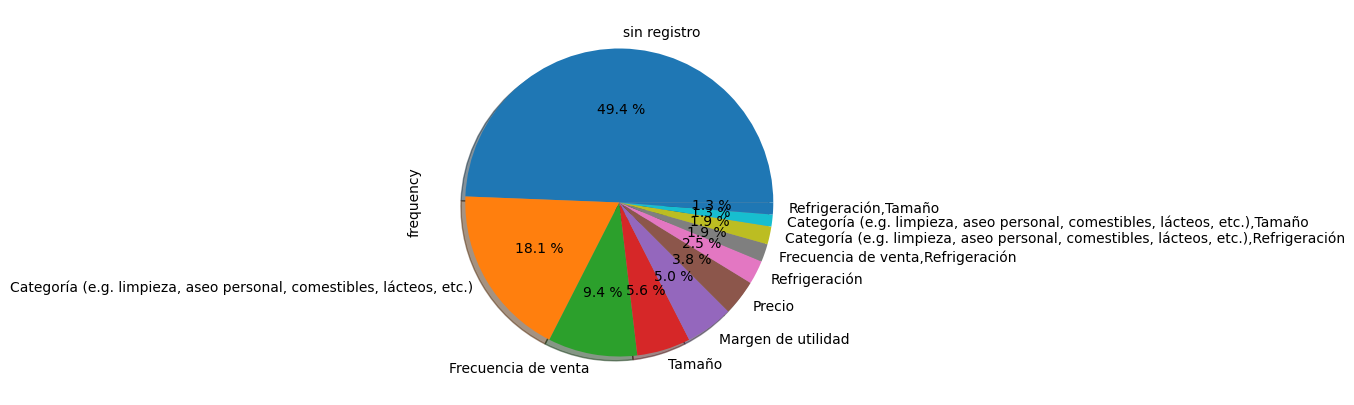

In [40]:
table= freq_tbl(Dataframe_final['158_charact_organize_products_on_shelves'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('158_charact_organize_products_on_shelves')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")


<Axes: ylabel='frequency'>

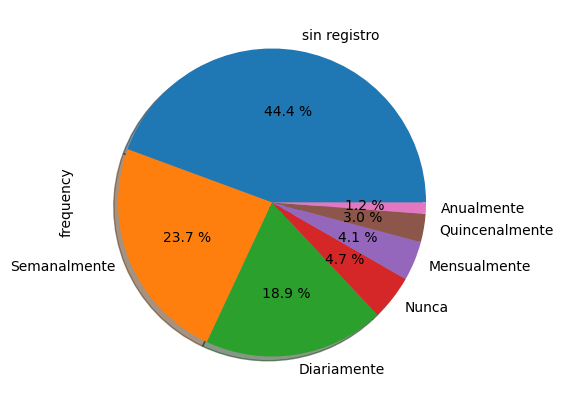

In [41]:

table= freq_tbl(Dataframe_final['157_frequency_organize_shelves'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('157_frequency_organize_shelves')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: ylabel='frequency'>

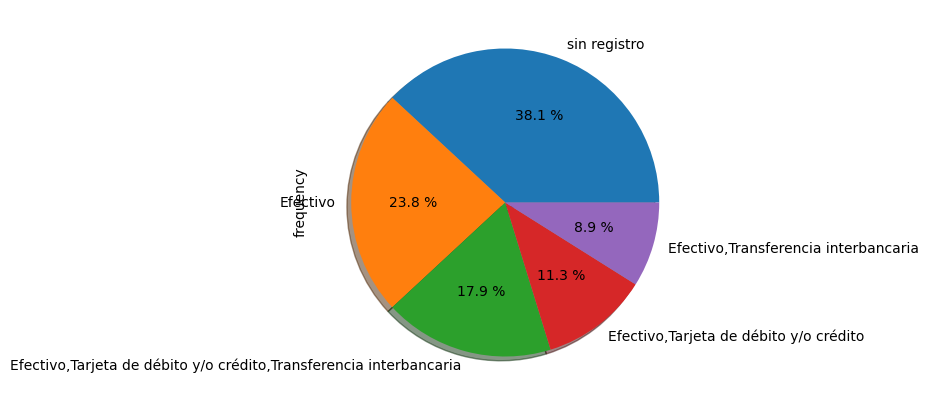

In [42]:
table= freq_tbl(Dataframe_final['189_payment_methods'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('189_payment_methods')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: ylabel='frequency'>

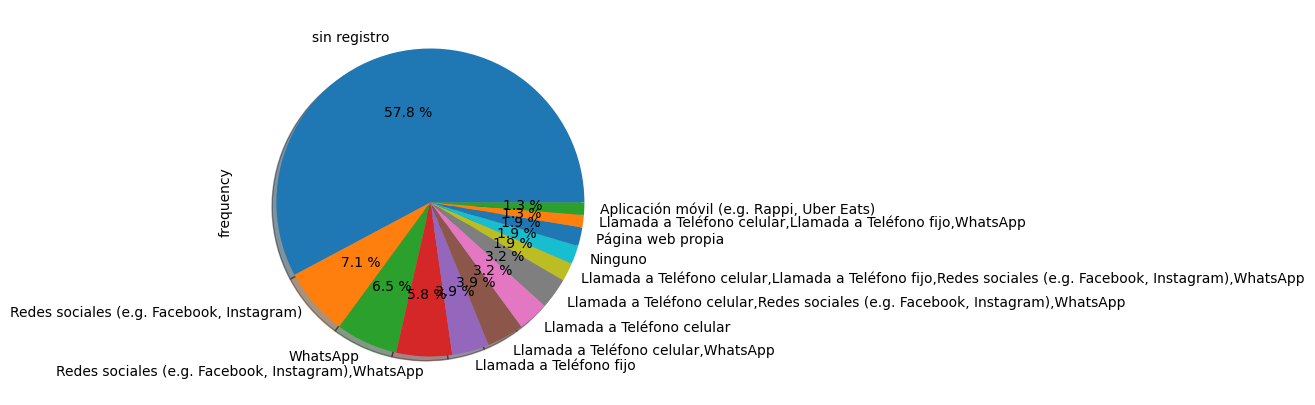

In [43]:

table= freq_tbl(Dataframe_final['210_sales_channels'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('210_sales_channels')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: ylabel='frequency'>

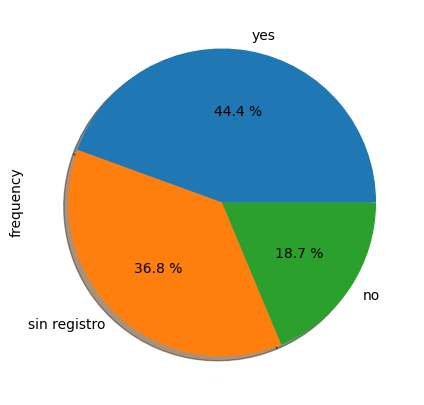

In [44]:
table= freq_tbl(Dataframe_final['186_internet_connection'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('186_internet_connection')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")


<Axes: ylabel='frequency'>

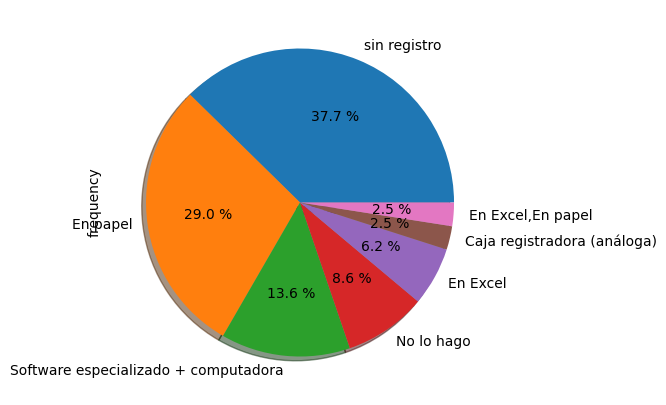

In [45]:
table= freq_tbl(Dataframe_final['18_sales_records'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('18_sales_records')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")


<Axes: ylabel='frequency'>

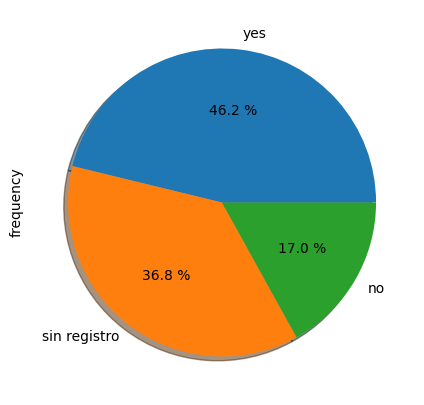

In [46]:

table= freq_tbl(Dataframe_final['20_reviews_finances_monthly'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('20_reviews_finances_monthly')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: ylabel='frequency'>

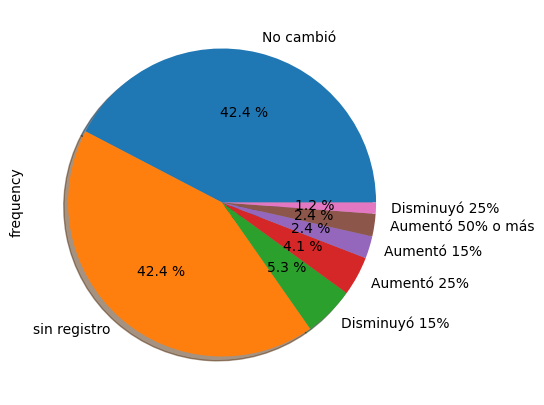

In [47]:
table= freq_tbl(Dataframe_final['5_change_store_space_last_year'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('5_change_store_space_last_year')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: ylabel='frequency'>

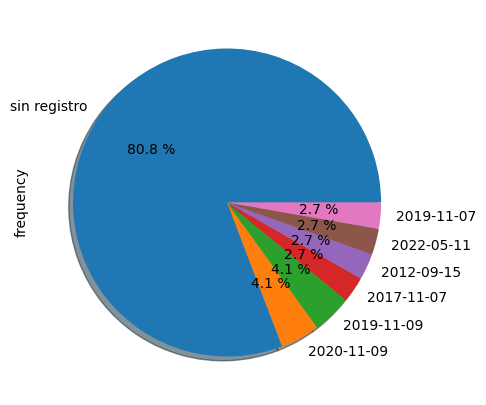

In [48]:
table= freq_tbl(Dataframe_final['233_date_establishment'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('233_date_establishment')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: ylabel='frequency'>

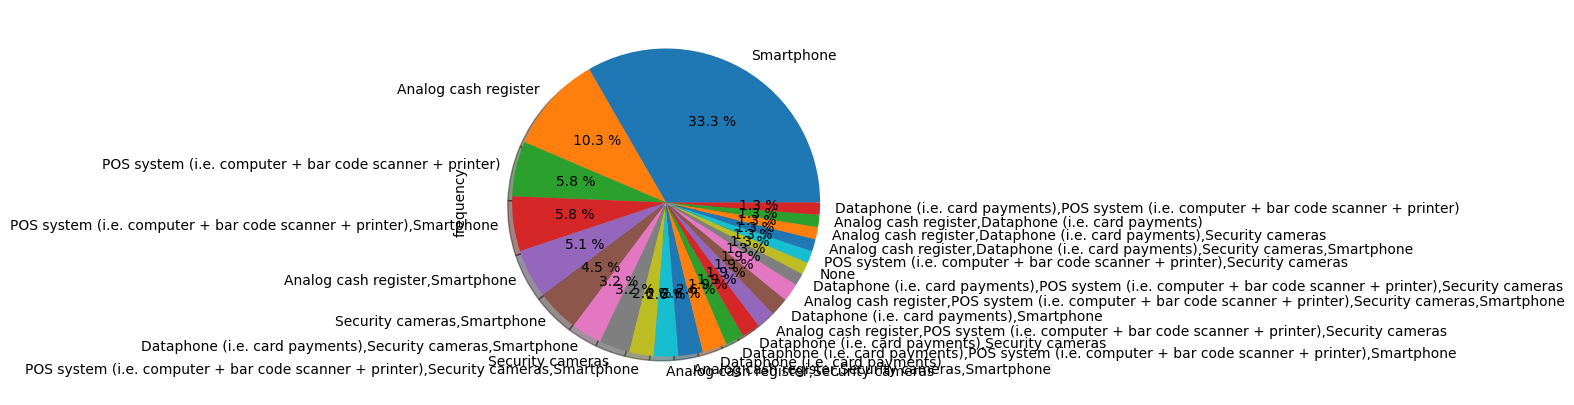

In [49]:
table= freq_tbl(Dataframe_final['184_store_devices'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('184_store_devices')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: ylabel='frequency'>

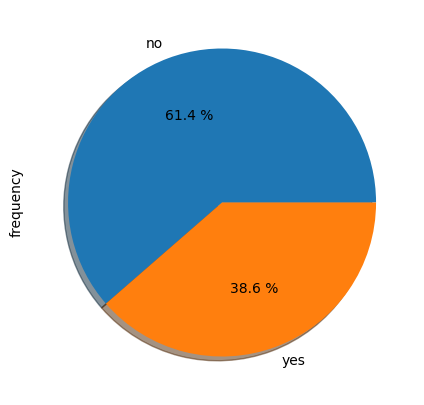

In [50]:
table= freq_tbl(Dataframe_final['102_does_the_micro_retailer_sells_fresh_products_'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('102_does_the_micro_retailer_sells_fresh_products_')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: ylabel='frequency'>

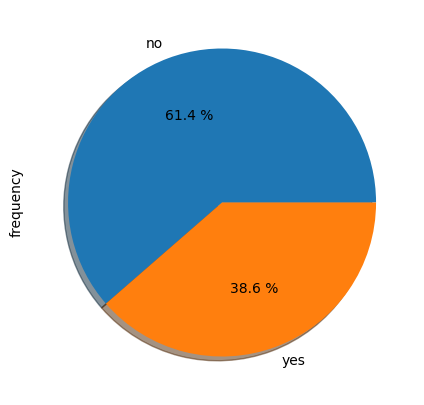

In [51]:
table= freq_tbl(Dataframe_final['102_does_the_micro_retailer_sells_fresh_products_'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('102_does_the_micro_retailer_sells_fresh_products_')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")